<a href="https://colab.research.google.com/github/pmontman/pub-choicemodels/blob/main/nb/03b_linear_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3b: Linear utility and beyond



We have mostly seen model that pose a linear relationship between the utilities
and some variables. This might seem as too strict and limiting, What if the relationship is clearly non-linear? Should we have to ditch the multinomial logit?.

Linear models are a bit more general than strict linear relationships from explanatory variables and the dependent variable. There is a bit of ambiguity in language. Technically, a linear model is any model that multiplies the input variables by some numbers (the coefficients) and then sums everything together.

But the 'input variables' can include transformations of any given variable.
Perhaps the most typical transformation are 'polynomials', when we square the variable (or cube, etc.).
Imagine that we are given an input variable $x$, such as age in years, then this would be a linear model:
$$y = \beta x$$
If we introduce $x^2$, we will also get a linear model. So this is also a linear model:
$$y = \beta x + \alpha x^2$$
it is clear that the if we just rename $x^2$ to $z$, we just get:
$$y = \beta x + \alpha z$$
which follows the definition of linear model.
Any other kind of transformation is allowed. For example:
$$ y = \beta \log(x)$$

What makes a model non-linear? It is when the transformation is part of the model, it is one of the parameters of the model that is fit to data.
For example, this would not be a linear model:

$$y = x^{\beta}$$

The main point is that the transformation has to be fixed **before** the model is estimated.
We might think of linear transformation of the variables, a fixed scaling by some number:
$$ y = \beta 3 x$$
This is also a linear model, but it generally not needed, because when the model is fit, we will get the same predictions than the untransformed model, only that the $\beta$ will change. These transformations are usually done just for the sake of interpretation, for example when varibales are very large (such as millions of dollars) and makes the coefficients to small to be comfortably read, it is common to scale the input varibale so the betas are easier to read, for example values around 1, instead of values around 0.0001.


In practice, there is a thin line between linear and non linear. For example, when we try several linear models to find the 'right' transformation *manually*, we will end up with something that is technically linear. But the whole process, is not a linear model. This is something that is usually dismissed in practice, but what we are doing is really a 'crude' implementation of a nonlinear model.

It is mostly about interpretation and the context. Even if a model is technically linear, if it includes variables such as $x^2$, when $x$ is the natural measurement of the variable, the one that we use every day, such as dollars instead of dollars squared, then the interpretation drastically changes.
Other type of variables, such as distances, for example metres, might have a natural interpretation, metres squared can represent surfaces, meteres cube can represent volume and be interpreted as litres, another natural dimension.
Even linear models with transformations, though techincally  linear, ar much more complicated. Our example in choice modelling is Willingness to pay, if we have just a linear model with natural variables, we can easy calculate WTP and interpret with just one number. If there are nonlinearities, we get a different WTF for each value of the variables! Much more complicated to interpret, we need to say, the WTP at this level of the variable, WTP at this other level of the variable. If cost is also introduced with transformation, then we have a surface of WTP, cannot even plot it with a 2d plot!.

If we are mathematicians (or acting as one) mostly interested about the properties of the families of models (as opposed to a specific model estimated to a dataset), we would be following the technical definition.



# Socioeconomic characteristics as covariables in Choice modelling under RUM

We have seen that the absolute level of utility cannot be recovered, or only 'differences' in utility matter. If we want to share the effect of a characteristic among all alternatives (as we did with cost and travel time in tutorial 3) we will see that it does not affect utility!. The values of characteristics depend on the individual, not on the alternative, so if we share the effect of a characteristic, it will be adding or removing the same amount of utility to all alternatives, leaving everything unchanged!
So the effect of socioeconomic characteristics must be estimated from each alternative (or group of alternatives) to be meaningful.




# Generality of linear models

It is often said that linear models are completely general, because with the right transformations of variables, they can represent **any** relationship.
The classic example is polynomial transformations, we know (since high school probably) that a polynomial of enough degree can fit any set of points.

You will find this rationale in books. This is technically correct but it is also misguiding when it is used to imply that linear models are just what you need for all your modelling problems. In practical applications, it is very difficult to find the correct vaiable transformations.

# Transformations

What types of transformations are available? How de we know which ones to use in our modelling problem?



# Plots to develop intuitions on transformations
We will give two visual clues, the first as 'separator curves' as the example below from [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). We view choice modeling as trying to find which zones in the plot belong to each alternative.

The second will be the classic linear regression interpretation, where the intuition if on the utility itself, how do we think a particular varaible affects utility o each alternative, and the the choice model will tend put most of the choice probability on the alternative with the largest utility.

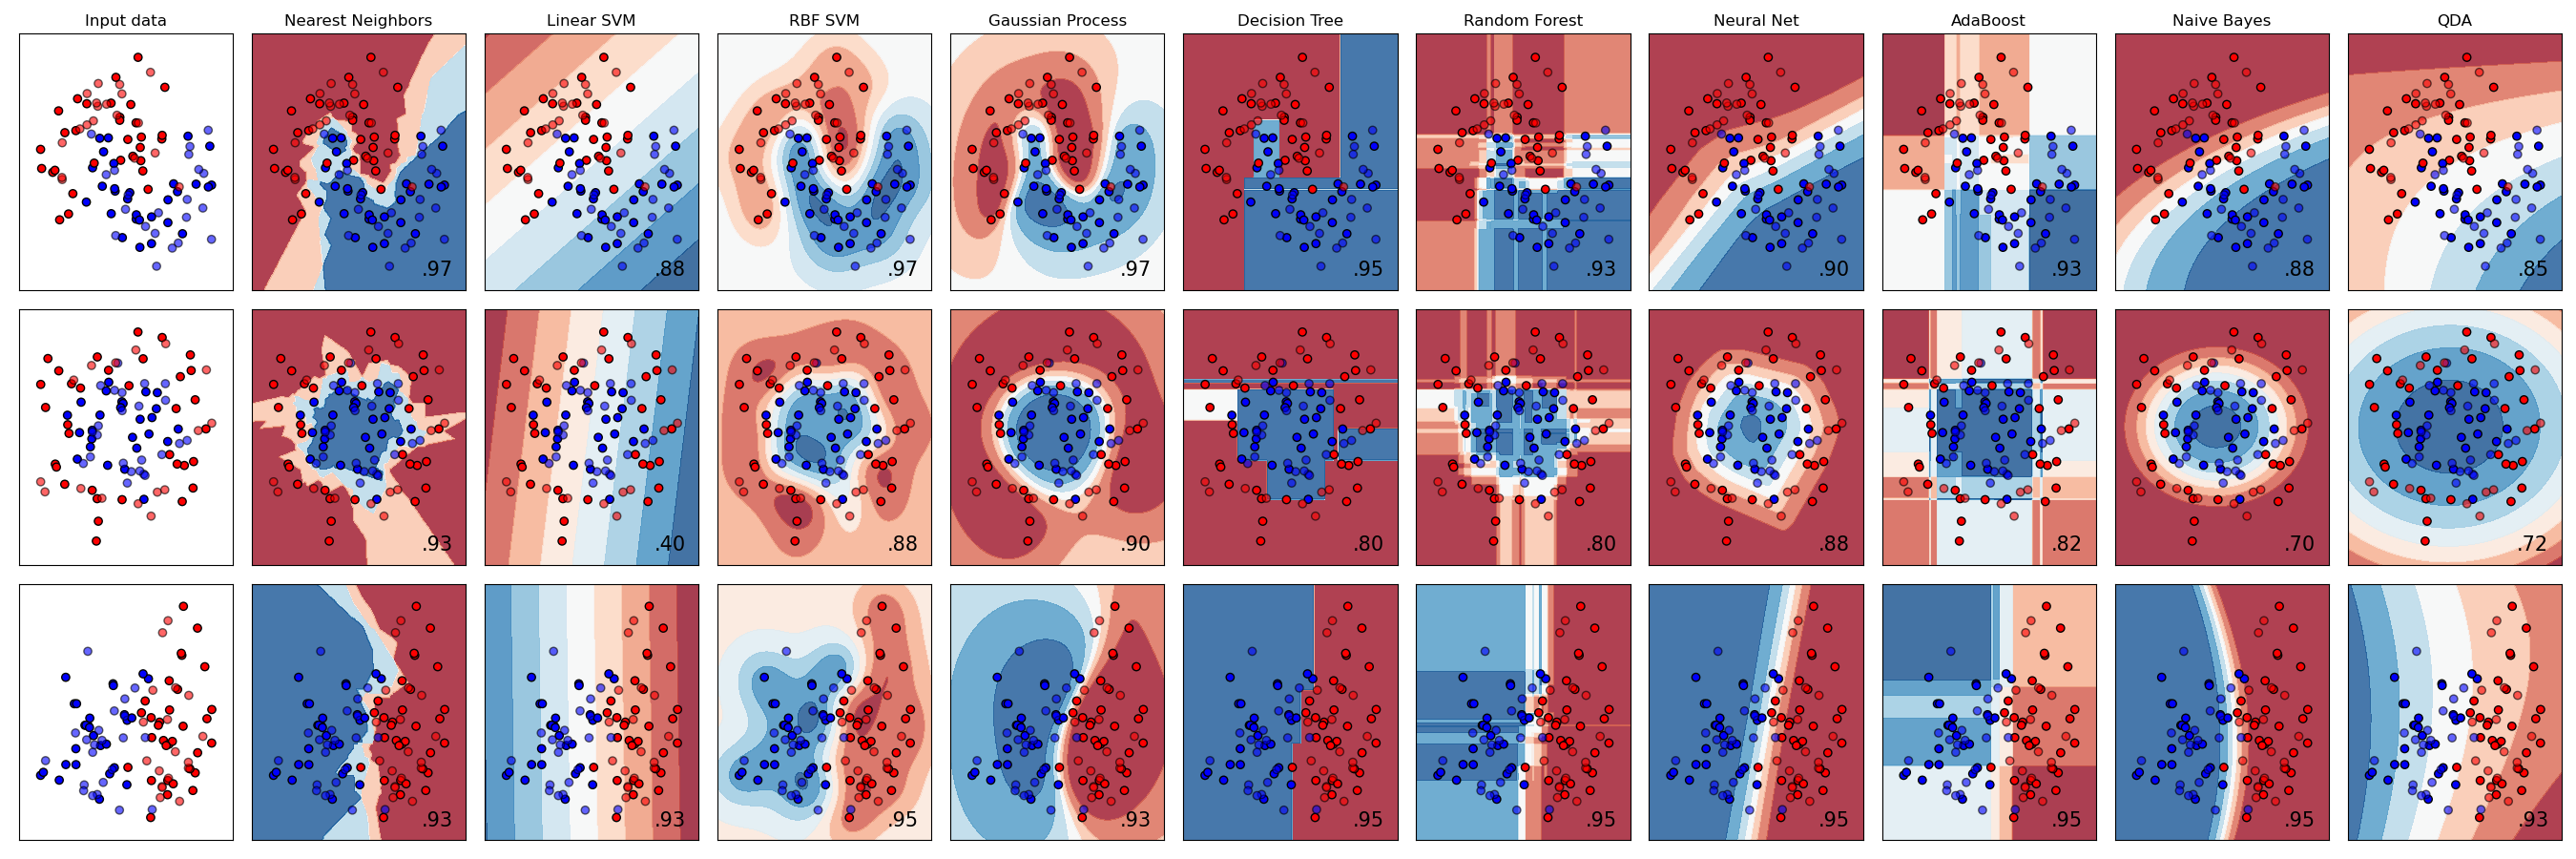


# Logarithm transform


Obvious thing is that it cannot be applied to negative values.
What usually does is 'space out' values in the lower ranges, close to 0 and compress values on the higher ranges. 



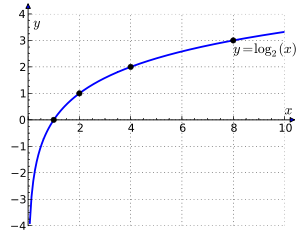



It can be applied to values that are naturally positive, such as age, income. distances, etc. when differences between larger values are less important than differences between smaller values.

We will see an example of using the cost of train.
If only two variables are considered and two alternatives, we can think of a choice modeling 'drawing a line' that separates the alternatives, the farther we are from that line, the larget the choice probability for the alternative on that side of the line.

In the swismetro example, lets consider income and the cost of a train trip.
We see that the values for train cost are 'packed' at the lower end, so maybe it pays off to apply a lgoarithm transform to make space them out.




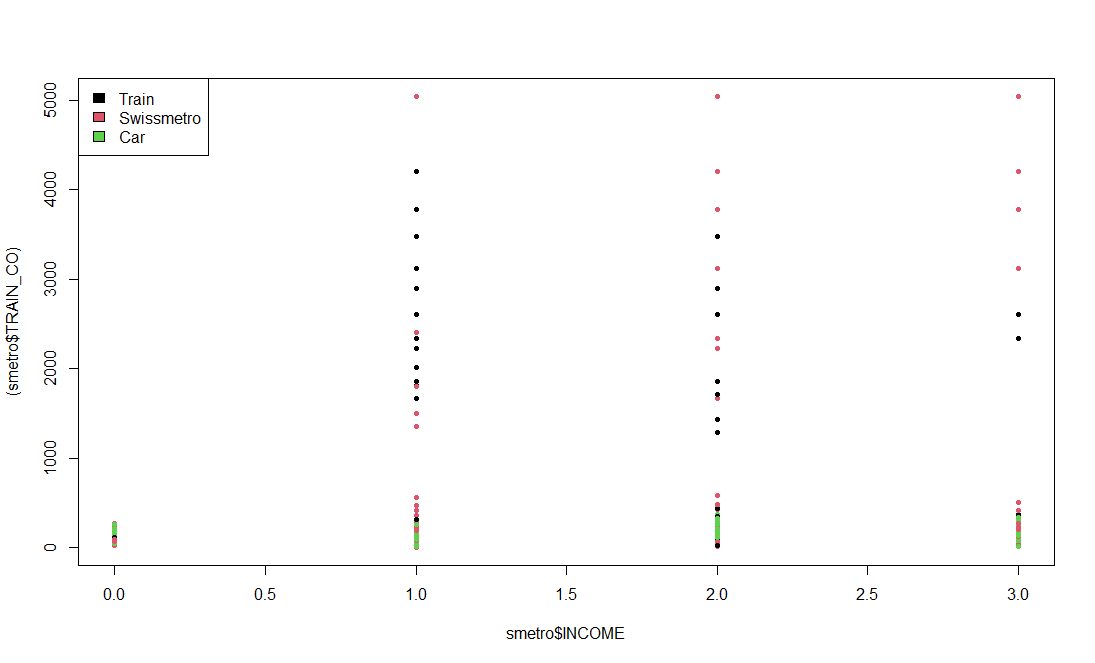

The results are noticeable, now we see. If for some reason we could trace 'two lines' we could separate car from train and swissmetro quite well.

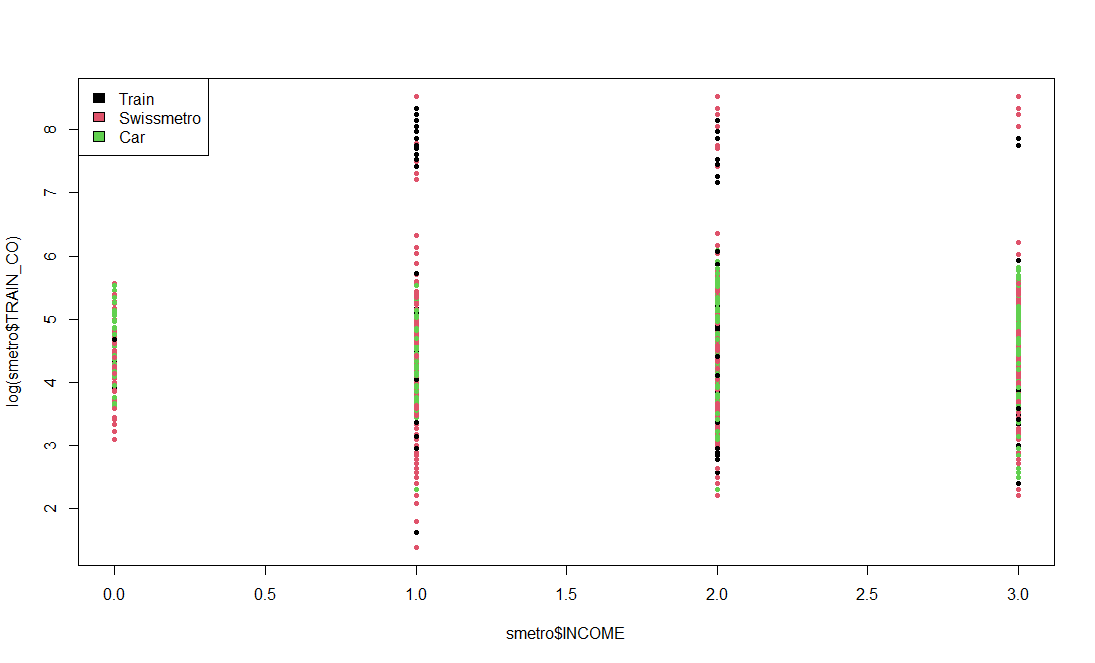

# Square root transform

Similar to the logarithm, but less severe.

#Exponential

Does the opposite of the logarithm, 'compresses' small values, including the negative (considered smaller than positive) and 'spaces out' the larger values.





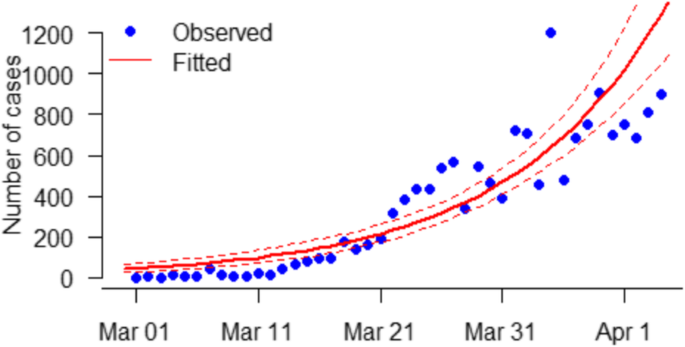

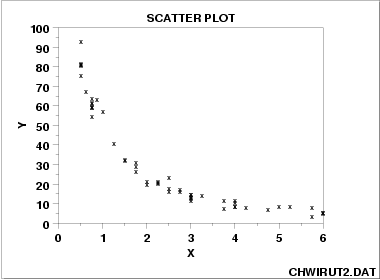

# Polynomials

Are quite difficult to get an intuition.
The most simple one is that odd degrees, such as cube, have the 'spacing out / compress relationship' of the exponential but extending it to the negative numbers.

Even degrees, such as squaring, have the 'spacing out / compress relationship' but the symmetrize around zero, so negative numbers become positive. We can use it when there might be a kind of symmetry around a particular value. the classic 'U' shape or inverted 'U'. 



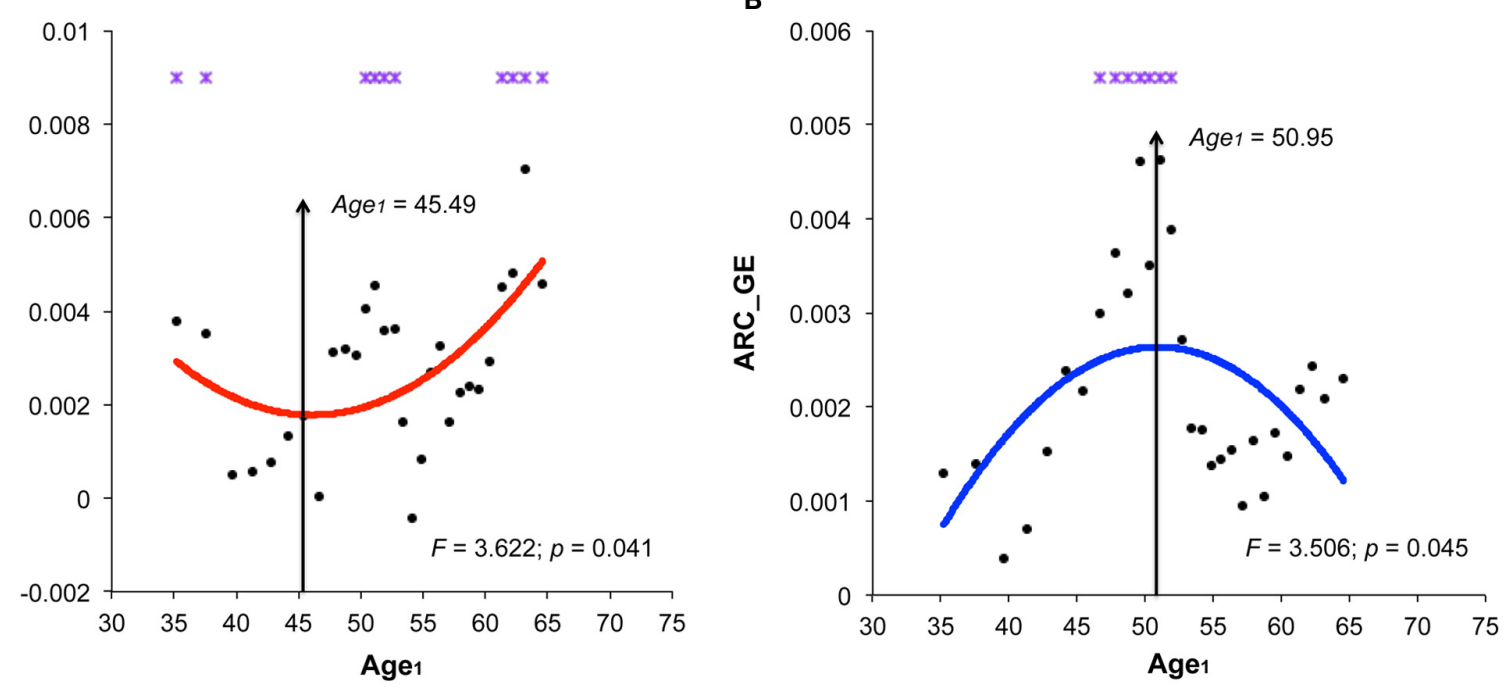



Combinations of different degrees are quite difficult to interpret.


# Interactions

Interaction with an indicator variable, it is a fitting a line for each group identified in the indicator variable.

In the following plot from [here](https://www2.stat.duke.edu/courses/Spring20/sta210.001/) we can see the visual intuition. Imagine that each color represents an alternative, Y would be the utility and X an explanatory variable.
On the left, the indicator variable is added. On the right, the indicator variable is added and also the interaction of the indicator with X.
Interaction allows us to estimate a 'different slope' for each group.

We can extend the intuition from indicator to ranges/continous, in such a way that it changes smoothly among the values from one extreme to the other. 



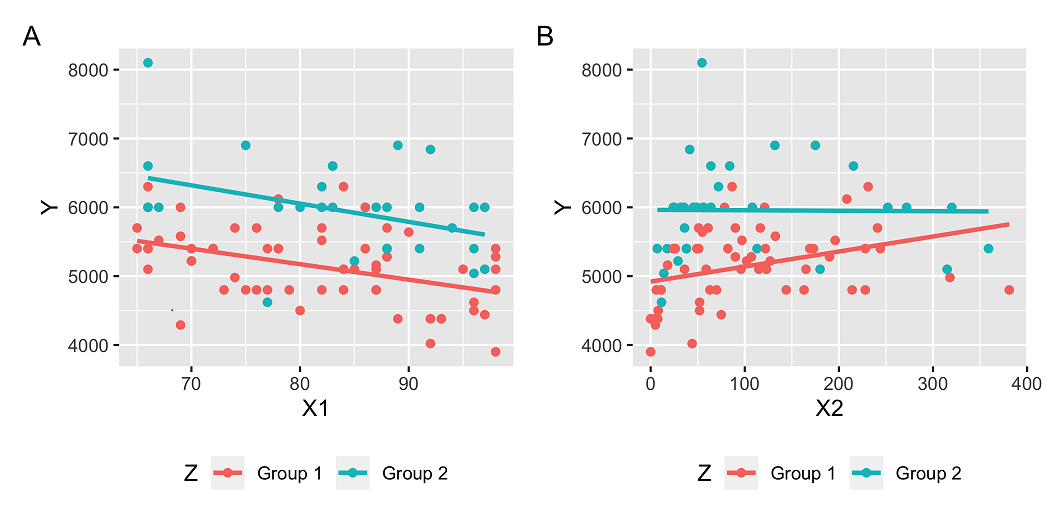


# Dummy / Indicator variables

Categorical variables

Piecewise constant relationships

We will see the an illustration the following picture, taken from [here](https://cnx.org/contents/p7GWrv3k@3.2:CnfwL33C@2/Denoising-II-Adapting-to-Unknown-Smoothness). Imagine that the x variable is the income and the blue line separates two alternatives well. It is very difficult to get a good linear relationship, imagine that it is a product that attracts lower income customer and higher income customers, but not middle income customers.

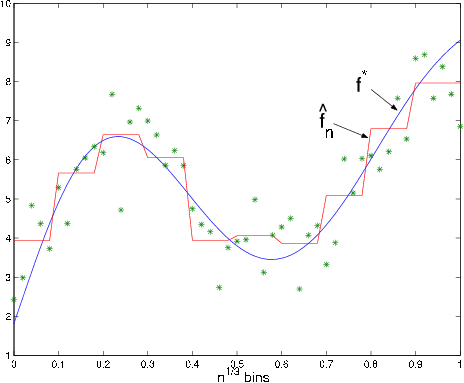